In [100]:
#for manipulations
import numpy as np
import pandas as pd
#for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#for interactivity

from ipywidgets import interact

In [101]:
#lets read the data set
data=pd.read_csv('data.csv')

In [102]:
#lets check the head of the dataset
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [103]:
#lets the the shape of dataset
data.shape

(2200, 8)

In [104]:
#lets check if there is any missing value present in dataset
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

>Fill-NA function is used to replace these missing values with statistical values such as mean,median or mode
>NA means notavailable
>pandas have function like Fill-NA to treat missing values


In [105]:
#lets check the crops present in this dataset
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [106]:
#lets check the summary for all the crops
print("average ratio of nitrogen in the soil:{0:.2f}".format(data['N'].mean()))
print("average ratio of phasphorous in the soil:{0:.2f}".format(data['P'].mean()))
print("average ratio of potassium in the soil:{0:.2f}".format(data['K'].mean()))
print("average temperature in celsius :{0:.2f}".format(data['temperature'].mean()))
print("average relative humidity in %:{0:.2f}".format(data['humidity'].mean()))
print("average ph values of the soil:{0:.2f}".format(data['ph'].mean()))
print("average rainfall in mm:{0:.2f}".format(data['rainfall'].mean()))



average ratio of nitrogen in the soil:50.55
average ratio of phasphorous in the soil:53.36
average ratio of potassium in the soil:48.15
average temperature in celsius :25.62
average relative humidity in %:71.48
average ph values of the soil:6.47
average rainfall in mm:103.46


In [107]:
#lets check the summary statistics for each of the crops

@interact
def summary(crops=list(data['label'].value_counts().index)):
    print("--------------------------------------------")
    print("statistics for nitrogen")
    print("minimum nitrogen required:",data['N'].min())
    print("Average nitrogen required:",data['N'].mean())
    print("maximum nitrogen required:",data['N'].max())
    print("--------------------------------------------")
    print("statistics for phosphorous")
    print("minimum phosphorous required:",data['P'].min())
    print("Average phosphorous required:",data['P'].mean())
    print("maximum phosphorous required:",data['P'].max())
    print("--------------------------------------------")
    print("statistics for potassium")
    print("minimum potassium required:",data['K'].min())
    print("Average potassium required:",data['K'].mean())
    print("maximum potassium required:",data['K'].max())
    print("--------------------------------------------")
    print("statistics for temperature")
    print("minimum humidity required:{0:.2f}".format(data['humidity'].min()))
    print("average humidity required:{0:.2f}".format(data['humidity'].mean()))
    print("maximum humidity required:{0:.2f}".format(data['humidity'].max()))
    print("--------------------------------------------")
    print("statistics for ph")
    print("minimum ph required:{0:.2f}".format(data['ph'].min()))         
    print("average ph required:{0:.2f}".format(data['ph'].mean()))
    print("maximum ph required:{0:.2f}".format(data['ph'].max()))
    print("--------------------------------------------")
    print("statistics for rainfall")
    print("minimum rainfall required:{0:.2f}".format(data['rainfall'].min()))
    print("average rainfall required:{0:.2f}".format(data['rainfall'].mean()))
    print("maximum rainfall required:{0:.2f}".format(data['rainfall'].max()))

   

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [108]:
#lets make this function more intvitive
@interact
def compare(conditions=['N','P','k','temperature','ph','humidity','rainfall']):
    print("crops which require greterthan average",conditions,'\n')
    print(data[data[conditions]>data[conditions].mean()]['label'].unique())
    print("----------------------------------------------------------")
    print("crops which require less than average",conditions,'\n')
    print(data[data[conditions]<=data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'k', 'temperature', 'ph', 'humidit…

In [109]:
#lets understand which crops can only be grown in summer season,winter season and rainy season

print("summer season")
print(data[(data["temperature"]>30)&(data["humidity"]>50)]["label"].unique())
print("-------------------------------------------------------")
print("winter crops")
print(data[(data["temperature"]<20)&(data["humidity"]>30)]["label"].unique())
print("-----------------------------------------------------------")
print("rainy crops")
print(data[(data["rainfall"]>200)&(data["humidity"]>30)]["label"].unique())

summer season
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-------------------------------------------------------
winter crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------------------------------------------
rainy crops
['rice' 'papaya' 'coconut']


In [110]:
from sklearn.cluster import KMeans

#removing the labels columns
x=data.drop(["label"],axis=1)
#selecting all the values of the data
x=x.values
#checkings the shape

print(x.shape)

(2200, 7)


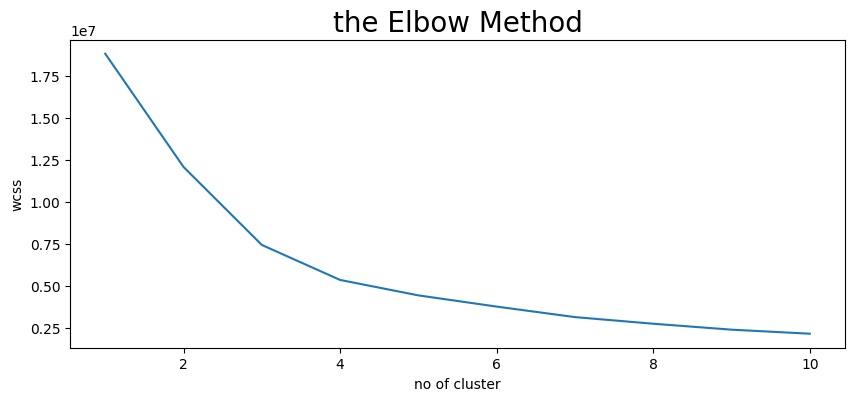

In [111]:
# lets determine the optinum number o cluster within the dataset

plt.rcParams['figure.figsize']=(10,4)
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters =i, init='k-means++',max_iter=300, n_init=10,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)


#lets plot the result
plt.plot(range(1,11),wcss)
plt.title("the Elbow Method",fontsize=20)
plt.xlabel("no of cluster")
plt.ylabel("wcss")
plt.show()

In [112]:
#lets imlement the k means alogorithmto perform clustring analysis
km=KMeans(n_clusters =i, init='k-means++',max_iter=300, n_init=10,random_state=0)
y_means=km.fit_predict(x)
#lets find out the result
a= data['label']
y_means=pd.DataFrame(y_means)
z=pd.concat([y_means,a],axis=1)
z=z.rename(columns={0:'cluster'})

#lets check the cluster of each crops
print("lets check the result after applying the k means clustering Analysis \n")
print("crops in first cluster:",z[z['cluster']==0]['label'].unique())
print("crops in second cluster:",z[z['cluster']==1]['label'].unique())
print("crops in third cluster:",z[z['cluster']==2]['label'].unique())
print("crops in fourth cluster:",z[z['cluster']==3]['label'].unique())

lets check the result after applying the k means clustering Analysis 

crops in first cluster: ['kidneybeans' 'pigeonpeas' 'mothbeans' 'mango']
crops in second cluster: ['grapes' 'apple']
crops in third cluster: ['rice' 'papaya' 'jute' 'coffee']
crops in fourth cluster: ['watermelon' 'muskmelon' 'papaya']


In [113]:
#lets split the dataset for predictive modelling
y=data['label']
x=data.drop(['label'],axis=1)
print("shape of x:",x.shape)
print("shaape of y:",y.shape)

shape of x: (2200, 7)
shaape of y: (2200,)


In [114]:
#lets create training and testing sets of validation of results
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("the shape of x_train:",x_train.shape)
print("the shape of y_train:",y_train.shape)
print("the shape of x_test:",x_test.shape)
print("the shape of y_test:",y_test.shape)

the shape of x_train: (1760, 7)
the shape of y_train: (1760,)
the shape of x_test: (440, 7)
the shape of y_test: (440,)


In [115]:
#lets create a predictive model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

C:\Users\ASHISH YADAV\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


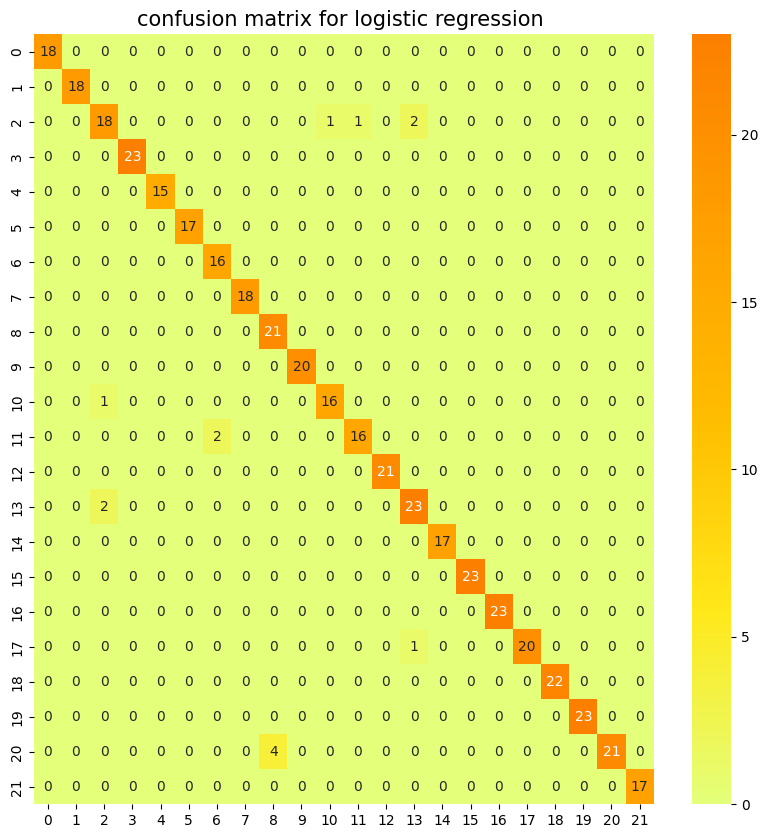

In [116]:
#lets evalute the model performance
from sklearn.metrics import confusion_matrix

#lets print the confusion matrix first
plt.rcParams['figure.figsize']=(10,10)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Wistia')
plt.title('confusion matrix for logistic regression ',fontsize=15)
plt.show()

In [118]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [120]:
prediction=model.predict((np.array([[90,
                                     40,
                                     40,
                                     20,
                                     80,
                                     7,
                                     200]])))

print("the suggested crops for given climatic condition is:",prediction)

the suggested crops for given climatic condition is: ['rice']


C:\Users\ASHISH YADAV\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
